


# Overview
Every suicide is a tragedy affecting many people around. It is also one of major risks of death especially among young people. [World Health organization](https://www.who.int/) organization maintains a suicide statistics dataset for many years. 
This dataset provides a number of events and population per year for several age groups per country, year,sex, and several age groups.
This allows to analyze what countries experienced the biggest change this century among the young generation.
Who changed for better, who changed for the worse? What is the overall world picture? What is the picture across other age groups?


# Introduction
Our dataset has 6 columns and 43776 rows. Three columns are numerical and 3 are categorical. When we look at the dataset we see a lot missing values and sometimes 0 for columns suicide_no and population. For our analysis we need to eliminate these records. When we select only rows with all the data in place our dataset reduced will to 2628 rows. It still gives enough data for analysis. 
Let's calculate suicide rate for for different age groups per 100,000 for men and women. Having that as input dataset we can see how the rate changed after year 2000. Mean and median rate for the entire dataset could be calculated as well.   
Below is the distribution for each variable of the dataset.
![init](allvars.png)



# Analysis
Analysis
Case rate is calculated as  number of cases * 100,000 / population. For the difference we calculate max_rate / min_rate

For age group of interest 15- 24 years we see the most significant changes in the following countries
![test](young_improv_big.png)

The following countries shown the  biggest setback 
![test](young_setback_big.png)


---------------


# Conclusion
This is initial analysis of the data shown non obvious results. Deeper analysis could be done by linking this dataset to other appropriate information and modeling based on combined data. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
sa=pd.read_csv('who_suicide_statistics.csv')
lfexp=pd.read_csv('LifeExpectancyData.csv')


In [3]:
sa.shape

(43776, 6)

In [4]:
sa.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [5]:
# do we have any missing ? 
sa.isnull().sum()


country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [6]:
#print(sa[sa.isnull().any(axis=1)]['population'].head(20))
pop0=sa[sa['population'].isnull()] 
#population_0=sa['population'].isnull
pop0.head(5)
# as rusult we see that population is missing when number of cases is 0

,country,year,sex,age,suicides_no,population
372,Anguilla,1983,female,15-24 years,0.0,NaN
373,Anguilla,1983,female,25-34 years,0.0,NaN
374,Anguilla,1983,female,35-54 years,0.0,NaN
375,Anguilla,1983,female,5-14 years,0.0,NaN
376,Anguilla,1983,female,55-74 years,0.0,NaN


In [7]:
# select years of interest 
sa = sa[(sa['year'] > 1999) & (sa['year'] < 2016) ] 

In [8]:
sa.shape

(21492, 6)

In [9]:
# do we have any missing ? 
sa.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no     408
population     2856
dtype: int64

In [14]:
# encode age and sex 
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5}
gender_coder = {'female':0,'male':1}


In [223]:
sa['age_encoder'] = sa['age'].map(age_coder)
sa['sex_encoder'] = sa['sex'].map(gender_coder)

In [224]:
sa.head(10)

,country,year,sex,age,suicides_no,population,age_encoder,sex_encoder,rate
180,Albania,2000,female,15-24 years,6.0,263900.0,1,0,2.273588
181,Albania,2000,female,25-34 years,3.0,245800.0,2,0,1.220504
182,Albania,2000,female,35-54 years,5.0,332200.0,3,0,1.505117
183,Albania,2000,female,5-14 years,0.0,324700.0,0,0,0.000000
275,Albania,2007,male,75+ years,8.0,42366.0,5,1,18.883067
185,Albania,2000,female,75+ years,2.0,37800.0,5,0,5.291005
186,Albania,2000,male,15-24 years,5.0,240000.0,1,1,2.083333
187,Albania,2000,male,25-34 years,17.0,232000.0,2,1,7.327586
188,Albania,2000,male,35-54 years,4.0,374700.0,3,1,1.067521
189,Albania,2000,male,5-14 years,1.0,374900.0,0,1,0.266738


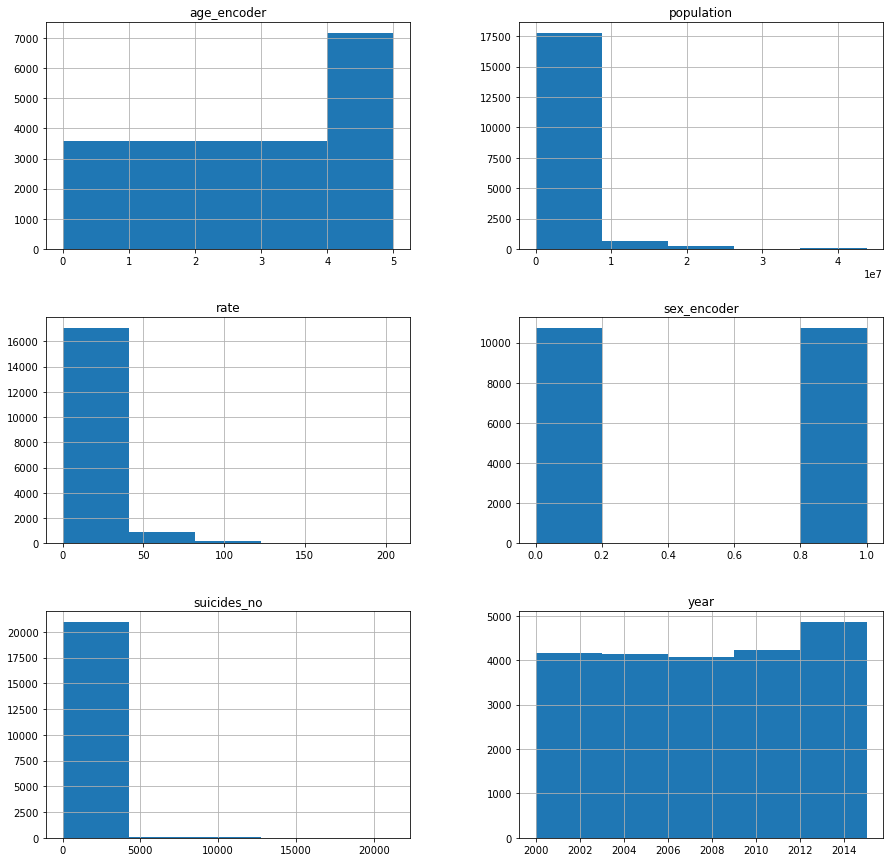

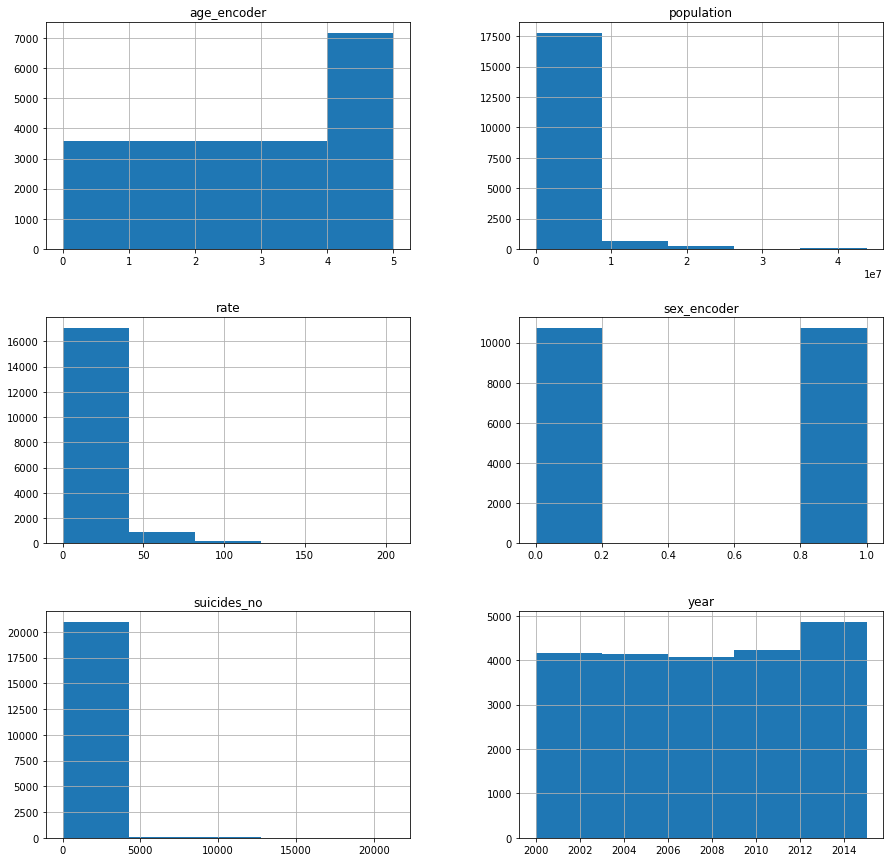

In [255]:
sa.hist(figsize = (15,15),bins=5 )
plt.savefig('allvars.png')
plt.show()

In [226]:
# Eliminate null
df=sa.dropna()

In [227]:
#elminate 0 
df=df[(df['suicides_no'] > 0) & (df['population'] > 0)]
df.shape

(14975, 9)

In [228]:
#Calculate rate per 100,000
rateFn = lambda row: 100000 * row['suicides_no'] / row['population']
df['rate'] = df.apply(rateFn , axis=1)

In [229]:
ta=df.groupby('age_encoder')[['suicides_no']].sum()

In [230]:
#ta=groupby('age_encoder')[['suicides_no']].sum()
en = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
print(ta.index.map(en.get))
#ta.head(11)

Index(['5-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years'],
      dtype='object', name='age_encoder')


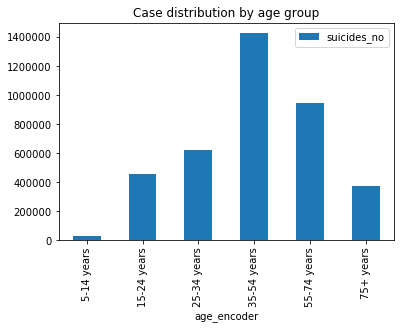

In [253]:
#Suicide based on age groups
en = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
plt.figure(figsize=(12,9))

ta.plot(ta.index.map(en.get), kind='bar', stacked=False, title='Case distribution by age group' )
#plt.title("Total Suicide based in Age group")
#plt.xlabel("Age Group")
#plt.ylabel("Number of Suicide")
plt.savefig("case_dist.png")
plt.show()

In [232]:
# select our age group using age encoder 
# let's look at young  group N 1
df=df[df['age_encoder']== 1] 
df.shape

(2629, 9)

In [234]:
df.head(5)

,country,year,sex,age,suicides_no,population,age_encoder,sex_encoder,rate
180,Albania,2000,female,15-24 years,6.0,263900.0,1,0,2.273588
186,Albania,2000,male,15-24 years,5.0,240000.0,1,1,2.083333
192,Albania,2001,female,15-24 years,9.0,271359.0,1,0,3.316640
198,Albania,2001,male,15-24 years,10.0,256039.0,1,1,3.905655
216,Albania,2003,female,15-24 years,14.0,283709.0,1,0,4.934634


In [235]:
###round(2.23456,3) will give 2.235

In [236]:
#
# sub with rapam df returning dict: country, year_min, rate_min, rate_max, rate_diff 
#steps: sort by country, for loop , calculate min, year, max year diff by country
# as result have: min cases year, max cases , year, diff.
# convert  dict to df
# sort by diff
#mamke separate ds for men 
#make DS for women
#calculate mean median of rate for all countries for each year 

#apply for men
# apply for women
# print top 5 changes for men 
# print top 5 for women 

# calculate mean and median for all countries separate for men and woman 
#for top changed countries. print change line over years
# men, women, 
#print type? 
# visual: 
# make one DS
#

In [237]:
df_men=df[df['sex_encoder'] == 1]
df_women=df[df['sex_encoder'] == 0]
# apply f
df_men.shape


(1372, 9)

In [238]:
def calc_min_max_diff(df):
    ''' calculates min, max, diff between  for each country inn given ds
        returns dict with result'''
    res={}
    i=0
    # make sure that df is sort by country, we don't care about the year
    df.sort_values('country', inplace=True)
    for row_index, row in df.iterrows():
        if i == 0:
            cscnt=row['country']
            csmin=row['rate']
            csmax=row['rate']
            csmin_year=row['year']
            csmax_year=row['year']
            i+=1
        elif row['country'] == cscnt:
            cs=row['rate']
            if cs > csmax :
                csmax=cs
                csmax_year=row['year']
            elif cs < csmin: 
                csmin=cs
                csmin_year=row['year']
            # if the same?     
        else:  ## country changed let's save the result 
            res[cscnt]= {'min':csmin, 'min_year':csmin_year,'max':csmax,'max_year':csmax_year,'dif':csmax / csmin}
            cscnt=row['country']
            csmin=row['rate']
            csmax=row['rate']
            csmin_year=row['year']
            csmax_year=row['year']      
            i+=1
    res[cscnt]= {'min':csmin, 'min_year':csmin_year,'max':csmax, 'max_year':csmax_year,'dif': csmax / csmin}
    pesdf=pd.DataFrame(res).T.sort_values(['dif'], ascending=[False])
    
    return pesdf

In [239]:
# make a test ds with 3 coutries, men and women separate, 
#try function for them 
#difference for men 
men_res= calc_min_max_diff(df=df_men)
#print(men_res)

C:\Users\Vadim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [240]:
women_res= calc_min_max_diff(df=df_women)

C:\Users\Vadim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [241]:
# choose one that shows changes for the best
#men changed for good  year
mcfg=men_res[men_res['max_year'] < men_res['min_year'] ]
wmcfg=women_res[women_res['max_year'] < women_res['min_year'] ]
mcfg.head(5)

,dif,max,max_year,min,min_year
Azerbaijan,22.240953,7.306889,2001.0,0.328533,2007.0
Qatar,17.634301,9.562188,2005.0,0.542249,2008.0
Belize,9.269079,26.934818,2011.0,2.905879,2012.0
Iceland,7.203843,59.825127,2000.0,8.304613,2011.0
Luxembourg,6.984902,23.168707,2002.0,3.316970,2009.0


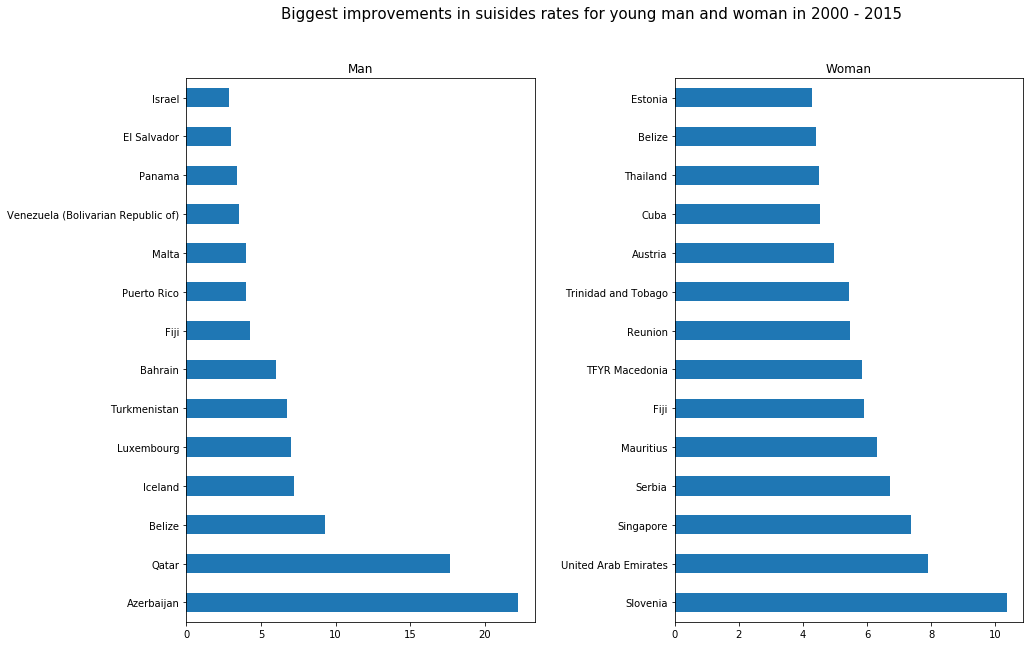

In [256]:
# plot top n countries 
fig, (ax1, ax2) = plt.subplots(ncols=2)
# man
mr= mcfg.iloc[0:14,0]
mr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Man', ax=ax1)
#woman
wr=wmcfg.iloc[0:14,0]
wr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Woman', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Biggest improvements in suisides rates for young man and woman in 2000 - 2015', fontsize=15)
fig.savefig("young_improv_big.png")
plt.show()

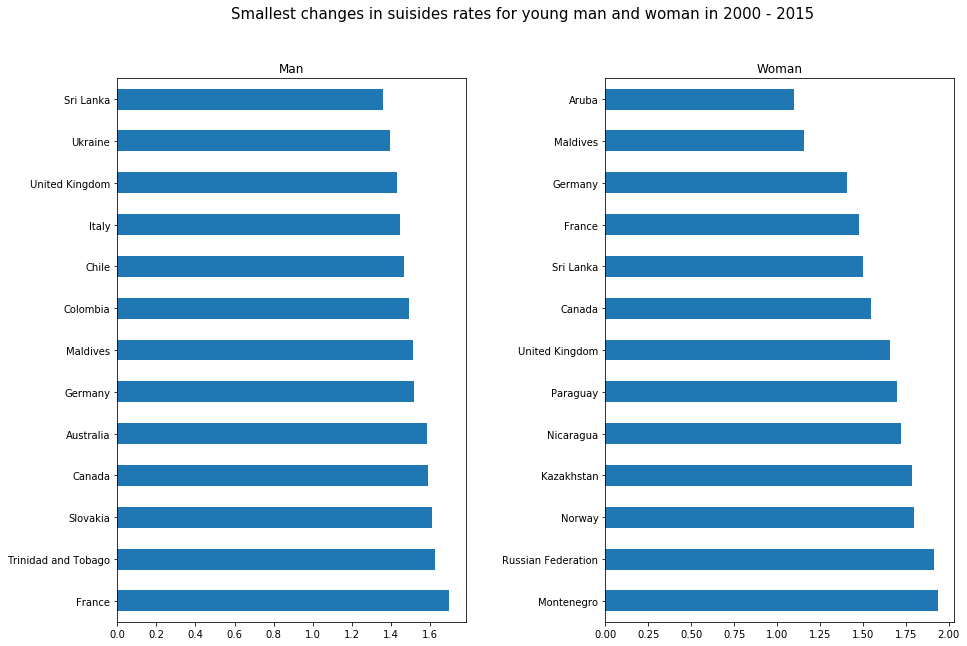

In [243]:
# didn't change much 
fig, (ax1, ax2) = plt.subplots(ncols=2)
# man
mr= mcfg.iloc[-14:-1,0]
mr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Man', ax=ax1)
#woman
wr=wmcfg.iloc[-14:-1,0]
wr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Woman', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Smallest changes in suisides rates for young man and woman in 2000 - 2015', fontsize=15)
fig.savefig("young_improv_small.png")
plt.show()

In [248]:
#
mcfw=men_res[men_res['max_year'] > men_res['min_year'] ]
wmcfw=women_res[women_res['max_year'] > women_res['min_year'] ]
mcfw.head(11)


,dif,max,max_year,min,min_year
Egypt,12.868095,0.665724,2012.0,0.051734,2007.0
Armenia,10.897232,3.621522,2006.0,0.332334,2003.0
Kuwait,9.533862,3.739576,2012.0,0.392241,2010.0
Cyprus,7.804112,12.720017,2013.0,1.629912,2006.0
Martinique,7.182759,26.641294,2008.0,3.709061,2005.0
Jamaica,5.651003,2.382068,2005.0,0.421530,2000.0
French Guiana,5.570501,38.177653,2004.0,6.853540,2002.0
Guadeloupe,5.272760,16.362327,2012.0,3.103181,2000.0
Georgia,4.914770,6.860371,2015.0,1.395868,2005.0
Singapore,4.186324,11.362646,2013.0,2.714230,2010.0


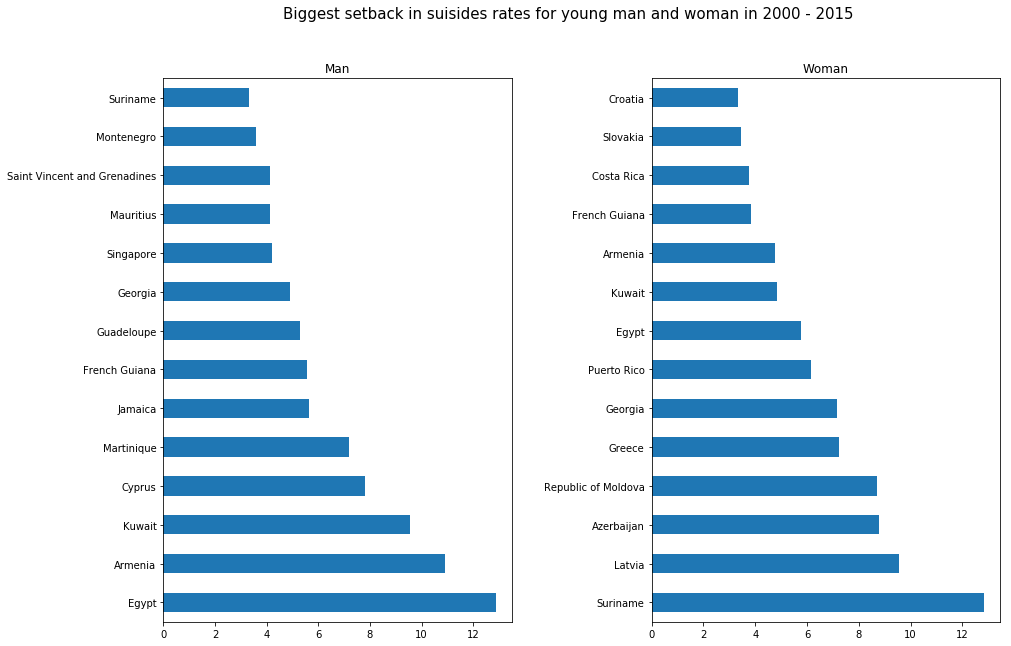

In [257]:
# plot top n countries 
fig, (ax1, ax2) = plt.subplots(ncols=2)
# man
mr= mcfw.iloc[0:14,0]
mr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Man', ax=ax1)
#woman
wr=wmcfw.iloc[0:14,0]
wr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Woman', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Biggest setback in suisides rates for young man and woman in 2000 - 2015', fontsize=15)
fig.savefig("young_setback_big.png")
plt.show()

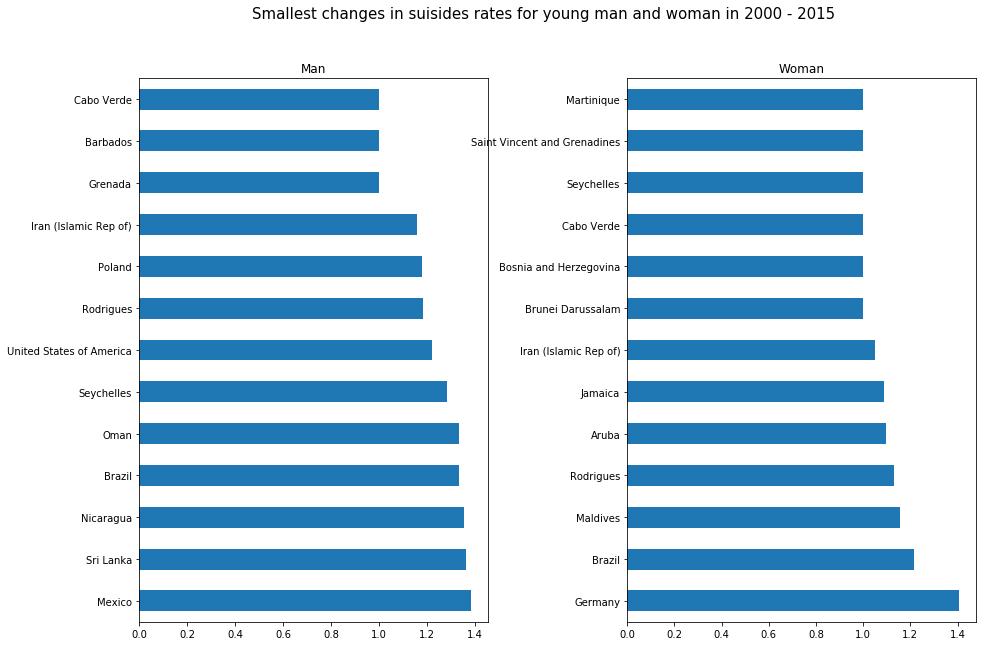

In [246]:
# show countries that have min rate diff
# plot top n countries 
fig, (ax1, ax2) = plt.subplots(ncols=2)
mr= men_res.iloc[-14:-1,0]
mr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Man', ax=ax1)
wr=women_res.iloc[-14:-1,0]
wr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Woman', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Smallest changes in suisides rates for young man and woman in 2000 - 2015', fontsize=15)
fig.savefig("young_improv_smaill.png")
plt.show()

In [ ]:
# for top country (max) do we have all ages ?

In [ ]:
#What is the difference between years for all ages for this county ?

In [ ]:
combine all ages per country

In [12]:
# Choose countries
#describe the data 
print(list(suis))
print(list(lfexp))
'''
#suis.describe()
selectedCoutries=['Canada','United States of America','Japan','Mexico']
df= df[df['country'].isin(selectedCoutries)] 
df = df[(df['year'] > 2000) & (df['year'] < 2017) ]
ages=df.groupby(['age').sum()
#ages.head(11)
'''

['country', 'year', 'sex', 'age', 'suicides_no', 'population']
['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


"\n#suis.describe()\nselectedCoutries=['Canada','United States of America','Japan','Mexico']\ndf= df[df['country'].isin(selectedCoutries)] \ndf = df[(df['year'] > 2000) & (df['year'] < 2017) ]\nages=df.groupby('age').sum()\n#ages.head(11)\n"

In [62]:
#
selectedCoutries=['Canada','Mexico','Guatemala','United States of America']
df= suis[suis['country'].isin(selectedCoutries)] 
df1 = df[(df['year'] > 2000) & (df['year'] < 2017) ]

sel=df1.groupby(['country','year']).sum()


# how to select one country or year after the groupby
def save_vals(cscnt,cmin,cmax):
    return res


In [64]:
# min / max
# in iteration
def difCalc(df)
    res={}
    for row_index, row in sel.iterrows():
        if i == 0:
            cscnt=row_index[0]
            csmin=row['rate']
            csmax=row['rate']
            i+=1
        elif row_index[0] == cscnt:
            cs=row['rate']
            if cs > csmax :
                csmax=cs
            elif cs < csmin: 
                csmin=cs
        else:  ## country changed let's save the result 
            res[cscnt]= csmin, csmax, csmax - csmin
            cscnt=row_index[0]
            csmin=row['rate']
            csmax=row['rate']
            i+=1
    res[ccnt]= csmin, csmax, csmax - csmin
    return res


{'Canada': (3512.0, 4054.0), 'Guatemala': (202.0, 512.0), 'Mexico': (3760.0, 6234.0), 'United States of America': (30607.0, 44189.0)}


In [68]:
print(list(lfexp))

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
